**RTSA 2023**

# Project A: Basic Line Formation

This project is based on Robert J. Rutten's "Stellar Spectra A" exercises.

#### Header and imports

The cells below contain some recommended python imports to solve the exercises.

In [1]:
import numpy
import matplotlib.pyplot as plt
from astropy import units
from astropy import constants
from astropy.visualization import quantity_support

quantity_support()
plt.rc('legend', frameon=False)

# Part 1

## 1.1 Background

In this part, you will reenact the work of Cecilia Payne-Gaposchkin at Harvard. Her [1925 PhD thesis](https://ui.adsabs.harvard.edu/abs/1925PhDT.........1P) was called "undoubtedly the most brilliant PhD thesis ever written in astronomy" by Otto Struve. Its opening sentences are:

> The application of physics in the domain of astronomy constitutes
  a line of investigation that seems to possess almost unbounded
  possibilities.  In the stars we examine matter in quantities and under
  conditions unattainable in the laboratory.  The increase in scope is
  counterbalanced, however, by a serious limitation - the stars are
  not accessible to experiment, only to observation, and there is no
  very direct way to establish the validity of laws, deduced in the
  laboratory, when they are extrapolated to stellar conditions.

Extrapolation of terrestrial physics laws is precisely what Payne did in her thesis. She applied the newly-derived Saha distribution for different ionisation stages of an element to stellar spectra, finding that the empirical Harvard classification represents primarily a temperature scale. Her work crowned efforts of Saha, Russell, Fowler, Milne, Pannekoek and others along the same lines. It illustrates that detailed physics, in this case atomic physics, is usually needed to explain cosmic phenomena.

<!-- <img src="https://tiagopereira.space/ast4310/images/payne_photo.svg" alt="Portrait of Cecilia Payne" width=300/> -->

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Cecilia_Helena_Payne_Gaposchkin_%281900-1979%29_%283%29.jpg/614px-Cecilia_Helena_Payne_Gaposchkin_%281900-1979%29_%283%29.jpg" alt="Portrait of Cecilia Payne" width=614/>

*Cecilia Payne-Gaposchkin (1900 - 1979)
    was educated at Cambridge (England) by Milne and Eddington.
    She went to the US in 1923 and spent the rest of her career at
    Harvard (in the other Cambridge near Boston).
    Her 1925 thesis was the first one in astronomy at Harvard
    University and remains highly readable as a wide review of stellar
    spectroscopy at the time.
    The main conclusion was that stellar composition does not change
    much from star to star.
    Russell had already suggested so a decade earlier, but her thesis,
    the first Harvard Observatory Monograph, brought the point home. Copied from [Hearnshaw (1986)](https://ui.adsabs.harvard.edu/abs/1986asoh.book.....H). Photo from Harvard College Observatory, Wikimedia Commons.*
    

The key graph in Payne's thesis (page 131, earlier published in
[Payne 1924](https://ui.adsabs.harvard.edu/abs/1924HarCi.256....1P)) is reprinted below. Clearly, the observed behavior in the upper panel is qualitatively explained by the computed behavior in the lower panel. We will recompute the latter.


<img src="https://tiagopereira.space/ast4310/images/payne_graph.svg" alt="Payne graph" width=800/>

*The strengths of selected lines along the spectral sequence.
    Upper panel: variations of observed line strengths with spectral
    type in the Harvard sequence.
    The latter is plotted in reversed order on a non-linear scale that
    was obtained by making the peaks coincide with the corresponding
    peaks in the lower panel.
    The y-axis units are eye estimates on an arbitrary scale.
    Lower panel: Saha-Boltzmann predictions of the fractional
    concentration $N_{r,s}/N$ of the lower level of the lines
    indicated in the upper panel, each labeled with its ionisation
    stage, on logarithmic y-axis scales that are specified per species
    at the bottom, against temperature $T$ along the x axis given in units of 1000 K along the top.The pressure was taken constant at $P_e = N_e k T =$ 13.1 Pa. From [Novotny (1973)](https://ui.adsabs.harvard.edu/abs/1973itsa.book.....N), who took it from [Payne (1924)](https://ui.adsabs.harvard.edu/abs/1924HarCi.256....1P).*
    
### 1.2 The Boltzmann and Saha laws

In thermodynamical equilibrium (TE), macroscopic equipartition laws 
hold with the gas temperature as the major parameter.
These are the Kirchhoff, Planck, Wien and Stefan-Boltzmann laws
for radiation, and the Maxwell, Saha and Boltzmann laws
for matter.  In this exercise we are concerned with the latter two.
They describe the division of the particles of a specific element 
over its different ionisation stages and over the discrete 
energy levels within each stage.
For example, the Saha law specifies the distribution
of iron particles between neutral iron (Fe), 
once-ionised iron (Fe$^+$), twice-ionised iron (Fe$^{2+}$), etc.,
whereas the Boltzmann law specifies the sub-distribution of the iron
particles per ionisation stage over the discrete energy levels
that each of the Fe, Fe$^+$, Fe$^{2+}$ etc. stages may occupy. (In astronomy 
  one doesn't write ions as Fe$^{3+}$ but rather as Fe IV.
  More precisely: Fe I is the *spectrum* 
  of neutral iron Fe, Fe II the *spectrum* of once-ionised iron
  Fe$^+$,  etc.)
  
The figure below illustrates the energy level structure of neutral hydrogen.

<img src="https://tiagopereira.space/ast4310/images/H_level_diagram_wide.svg" alt="H I level diagram" width="600"/>

*Energy level diagram for hydrogen.
  They approach the ionisation threshold at $\chi_H$ = 2.18 aJ 
  for $n \rightarrow \infty$.
  The principal quantum number $n$ equals the level counter $s$ in this
  simple structure.
  The fine structure of each level (splitting in $2\,n^2$ sublevels)
  is not shown.
  For each of the first four hydrogen series the principal 
  bound-bound transitions between bound levels are marked by vertical lines 
  with the name and the wavelength of the corresponding spectral line.
  The series limits $(n=\infty$) are also marked.
  A bound-free ionisation/recombination transition is added to the
  Balmer series.  The amount of energy above the ionisation threshold 
  represents the kinetic energy that is gained or lost.
  A free-free transition (radiative encounter between a bare
  proton and a free electron) is also marked.  The bound-free and free-free
  transitions contribute to stellar continua, while the bound-bound
  transitions produce the hydrogen lines.  The Lyman lines are in
  the ultraviolet, the Balmer lines are in the visible and the Paschen 
  and Brackett lines are in the infrared.   Some Balmer lines are present 
  in the stellar spectrograms [shown above](#spectrograms).
  The solar Balmer $\alpha$ line is usually called H$\alpha$.*
  
#### 1.2.1 Boltzmann law

In TE the partitioning of a specific atom or ion stage 
over its discrete energy levels ("excitation equilibrium")

\begin{equation} \tag{1}
    \frac{n_{r,s}}{N_r} = \frac{g_{r,s}}{U_r} \mathrm{e}^{-\chi_{r,s}/kT},
    \label{eq:5.16a}
\end{equation}

with $T$ the temperature, $k$ the Boltzmann constant,
$n_{r,s}$ the number of particles per m$^3$ 
in level $s$ of ionisation stage $r$,
$g_{r,s}$ the statistical weight of that level, and
$\chi_{r,s}$ the excitation energy of that level measured 
from the ground state $(r,1)$,
$N_r \equiv \sum_s n_{r,s}$ the total particle density in all levels
of ionisation stage $r$, and $U_r$ its *partition function* defined by

\begin{equation} \tag{2}
   U_r \equiv \sum_s g_{r,s} \mathrm{e}^{-\chi_{r,s}/kT}. 
   \label{eq:5.16}
\end{equation}

Thus, the neutral stage has $r=1$, each ground state
is at $s=1$, and each ground state has excitation energy $\chi_{r,1}=0$ 
and ionisation energy to the next stage $\chi_r$.
A radiative deexcitation between levels $(r,s)$ and $(r,t)$,
with level $s$ 'higher' than level $t$,
releases a photon with energy $\chi_{r,s} - \chi_{r,t} =  h\nu = h c/\lambda$, 
with $h$ the Planck constant, $\nu$ the photon frequency,
$c$ the velocity of light and $\lambda$ the wavelength.
The excitation energy $\chi_{r,s}$ is the energy difference
between the excited level $(r,s)$ and
the ground state $(r,1)$.
Astronomers usually call it "excitation potential"
and measure it from the ground state up in electron volt, with 1 eV corresponding to $1.6022 \times 10^{-19}$ J. (Physicists prefer "binding energy" from the ground state of the next ion measured in wavenumbers (m$^{-1}$).)
For example, the H I Balmer $\alpha$ line results from photonic
transitions between levels $n=2$ and $n=3$ of neutral hydrogen, with
$\chi_{1,3} = 12.09$ eV, $\chi_{1,2} = 10.20$ eV and
wavelength $\lambda = hc/(\chi_{1,3} - \chi_{1,2})= 656.5$ nm.

The number densities $n_{r,s}$ and $n_{r,t}$ are called
"level populations" and are usually measured per m$^3$.

The statistical weights $g_{r,s}$ measure the
degeneracy of levels due to magnetic fine splitting.
The latter occurs only in the presence of an external magnetic field;
in its absence, magnetic fine-structure levels coincide and 
may accommodate more particles than allocated per single level 
by the Pauli exclusion principle.  
The weights measure such excess.  
For example, neutral hydrogen atoms have $g_{1,1}=2$ for their
ground state because the electron and proton spins can be
parallel or anti-parallel (the fine-structure transition between the two states produces the 21 cm radio line 
   from interstellar gas).


#### 1.2.2 Saha law

In TE the particle partitioning
over the various ionisation stages of an element ("ionisation
equilibrium") is given by the *Saha distribution*:

\begin{equation} \tag{3}
   \frac{N_{r+1}}{N_r}
    = \frac{1}{N_e} \frac{2U_{r+1}}{U_r}
      \left(\frac{2 \pi m_e kT}{h^2}\right)^{3/2} 
      \mathrm{e}^{-\chi_r/kT},
  \label{eq:5.17}
\end{equation}

with $N_e$ the electron density, $m_e$ the electron mass,
$\chi_r$ the threshold energy needed to ionise stage $r$ to stage $r+1$,
and $U_{r+1}$ and $U_r$ the partition functions of ionisation stages
$r+1$ and $r$ defined by (\ref{eq:5.16}).
The ionisation energy $\chi_r$ is the minimum photon energy 
that is absorbed at ionisation or emitted at recombination in
a bound-free interaction.
The factor two represents the statistical weight of the freed electron,
which has $g_e = 2$ due to the two orientations that its spin
may take.  The scaling with $1/N_e$ says that ionisation is
easier if there is room for the resulting free electron or, reversedly,
that recombination from stage $r+1$ to stage $r$ requires 
catching a free electron. 
The kinetic energy of the free electron contributes the 
$(\ldots)^{3/2}$ term
through the Maxwell velocity distribution.


#### 1.2.3 Saha-Boltzmann Populations of Hydrogen

The level energies and statistical weights of hydrogen can be calculated exactly using the relations:

\begin{align} \tag{4}
g_{1,s} &= 2s^2 \\ \tag{5}
\chi_{1, s} &= 13.598 (1- 1/s^2)\; \mathrm{eV}
\end{align}

By far the largest jump in energy is from the ground level to the first excited stage, as illustrated in the level diagram earlier. 
The first excited level $s=2$ is at such high excitation energy that its small Boltzmann factor makes its population negligible 
in comparison with the ground state population.  However, the increase with $s$ at large values of $s$ shows 
that the hydrogen partition function would get infinite 
if too many levels are included in the summation, 
because $g_{1,s} \sim s^2$ while $\chi_{1,s} \rightarrow 13.598$ eV.
Actually, all atoms and ions share in this behavior at very high excitation
energy since they all get to be "hydrogenic" in nature 
(when the valence electron sits in a nearly detached orbit).
This singularity has been a cause of much debate, but real atoms
are not worried by it.  They are never alone and loose their identity through interactions with neighbours long 
before they grow as large as this. 
(They are never alone where TE holds. In intergalactic space they may be
  lonely but they won't sit in their high levels.)
A reasonable cut-off value to the orbit size is set by the mean
atomic interdistance $N^{-1/3}$ (page 260 of [Rybicky & Lightman](https://ui.adsabs.harvard.edu/abs/1986rpa..book.....R));

\begin{equation} \tag{6}
   s_\mathrm{max} \approx \sqrt{\frac{r}{a_0}} \,\,\, N^{-1/6},
\end{equation} 

giving $s_\mathrm{max} \approx 100$ for hydrogen 
at $N_\mathrm{H} = 10^{18}$ m$^{-3}$.
With such a cut-off the partition functions are generally not much larger
than the ground state weights at all temperatures of interest - those at which the pertinent stage of ionisation is not devoid 
of population anyhow.

---

### Exercise 1: Saha-Boltzmann populations of a simplified Ca atom [10 points]

Using a model atom, we can calculate numerically the quantities given above in the Boltzmann and Saha laws. A model atom is simply a collection of the atomic data necessary: level energies $\chi_{r,s}$, ionisation energies $\chi_r$, and the statistical weights $g_{r,s}$. For temperature, density, and pressure we will use values similar to those on a stellar atmosphere. We start with a simplified model of calcium, with 65 levels across five ionisation stages.

Why calcium? It is an important element, and later we will use it to make a comparison with hydrogen, by far the most abundant element in the universe. In this directory you will find model atoms for several elements (`*_atom.txt`). The atom file format is: one level per line, with the energy in wavenumbers (cm$^{-1}$), followed by the statistical weight and ionisation stage. In this exercise you will use `Ca_atom.txt`. To read the file format into a data structure you can manipulate, you can use the following `Atom` class with a method `read_atom()`:

In [2]:
class Atom:
    """
    Reads atomic data, calculates level populations according to Boltzmann's law,
    and ionisation fractions according to Saha's law.
    """
    
    def __init__(self, atomfile=None):
        """
        Parameters
        ----------
        atomfile : string, optional
            Name of file with atomic data. If not present, atomic data needs
            to be loaded with the .read_atom method.
        """
        self.loaded = False
        if atomfile:
            self.read_atom(atomfile)
        
    def read_atom(self, filename):
        """
        Reads atom structure from text file.
        
        Parameters
        ----------
        filename: string
            Name of file with atomic data.
        """
        tmp = numpy.loadtxt(filename, unpack=True)
        self.n_stages = int(tmp[2].max()) + 1
        # Get maximum number of levels in any stage
        self.max_levels = 0
        for i in range(self.n_stages):
            self.max_levels = max(self.max_levels, (tmp[2] == i).sum())
        # Populate level energies and statistical weights
        # Use a square array filled with NaNs for non-existing levels
        chi = numpy.empty((self.n_stages, self.max_levels))
        chi.fill(numpy.nan)
        self.g = numpy.copy(chi)
        for i in range(self.n_stages):
            nlevels = (tmp[2] == i).sum()
            chi[i, :nlevels] = tmp[0][tmp[2] == i]
            self.g[i, :nlevels] = tmp[1][tmp[2] == i]
        # Put units, convert from cm-1 to Joule
        chi = (chi / units.cm).to('aJ', equivalencies=units.spectral())
        # Save ionisation energies, saved as energy of first level in each stage
        self.chi_ion = chi[:, 0].copy()
        # Save level energies relative to ground level in each stage
        self.chi = chi - self.chi_ion[:, numpy.newaxis]
        self.loaded = True

To solve this exercise, it is recommended you add a few methods to class `Atom` to calculate the partition function and populations according to Saha-Boltzmann. 

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
    

* *[5 points]* Speculate how ionisation can fully deplete a stage (e.g. all atoms can transition from neutral to ionised) while excitation puts only a few atoms in levels just below the ionisation level. Hint: what is the limit of the Saha and Boltzman ratios for infinite temperature?

* *[5 points]* Plot a "Payne curve" for the simplified Ca atom (in `Ca_atom.txt`) using a temperature range of 100 - 175,000 K. Start with $P_e$ = 100 Pa and study how $P_e$ affects the diagram. What is going on?

</div>

### Exercise 2: Solar Ca$^+$K versus H$\alpha$ [25 points]

The figure below compares the solar spectrum of H$\alpha$, the principal line in the Balmer sequence (transition fron $n=$3 to $n=$2, $\lambda =$ 656.5 nm, see diagram in section 1.2) with the spectrum of Ca$^+$K (transition from $n=$2 to $n=$1, $\lambda =$ 393.5 nm), known in astronomical notation by Ca II K. (The K is an extension from Draper to the original alphabetic solar spectrum feature list by Fraunhofer, who only named Ca II H in his alphabetic feature naming from red to blue.)

The main line in the lefthand panel (Ca$^+$K) is much stronger
than the one at right (H$\alpha$). Since stars as the sun are mostly made up of hydrogen, it may come as
a surprise that a calcium line is much stronger than a hydrogen line.
However, by now (in your role of being Cecilia Payne) it is clear to
you that line strength ratios between different elements do not only
depend on their abundance ratio but also on the temperature.
We will quantify this dependence for this solar line pair.

<img src="https://tiagopereira.space/ast4310/images/CaK_Halpha.svg" alt="Solar Ca II K and Halpha spectra" width="800"/>

*Two sections of the solar spectrum displaying the strongest lines
   in the visible region (except that Ca$^+$ H at $\lambda =$
   396.7 nm is very similar to its doublet twin Ca$^+$ K).
   The lefthand segment contains the central part of the Ca$^+$ K
   line in the violet region of the spectrum, the righthand segment
   the H$\alpha$ line in the red.
   Each segment is 3 nm wide.
   The vertical axis measures disk-averaged solar intensity so that
   these plots portray the solar spectrum as if it came from a
   non-resolved distant star.
   The units are kW m$^{-2}$ nm$^{-1}$,
   obtained by integrating the solar intensity over the solar disk (solid angle).
   The line crowding is much larger in the violet than in the red.
   Most of the numerous "blends" (overlapping lines) that are
   superimposed on the wings of Ca$^+$ K are due to iron, an element
   with extraordinary rich energy level structure. The strong blend at 394.5 nm is due to aluminium atoms.  Very close to line center the Ca$^+$ K line displays two tiny
   emission peaks which betray the presence of magnetic fields in a
   way that is not understood. Stars that are more active than the sun have much higher peaks in
   their Ca$^+$ K line cores.  The damping wings start just outside these peaks and extend much
   further than the plotted range.
   The H$\alpha$ line in the righthand panel is much weaker. The cores of both lines are formed in the solar chromosphere, the
   regime where magnetic fields take over from the gas pressure in
   dominating solar fine structure.  There are hundreds of studies
   of cool-star chromospheres using the Ca$^+$ K line core because
   its emission is an indicator of stellar magnetism.
   The Ca$^+$ K line is also much used in recent studies of solar
   chromospheric dynamics. The temperature sensitivity of H$\alpha$ makes it complementary to
   Ca$^+$ K as an atmospheric diagnostic, especially of the magnetic
   field structures and their not-understood heating processes in the
   upper chromosphere. These show up as thread-like brightenings and darkenings arranged
   as flower petals in images taken in H$\alpha$ line-center radiation. These plots are made from the
  "Kitt Peak Solar Flux Atlas" compiled by [Robert Kurucz](http://kurucz.harvard.edu/sun.html), made with 
   the Fourier Transform Spectrometer at Kitt Peak, a 1-metre Michelson interferometer with the unsurpassed spectral resolution
   of $\lambda / \Delta \lambda =$ 10$^6$.* 

To compute the relative strength between the Ca$^+$ K and H$\alpha$ lines you will use the code developed so far. Your `Atom` class can be used to compute the populations of any model atom, and in the current directory we have model atoms for H and Ca. Another necessary ingredient is the Ca abundance relative to hydrogen. In the Sun, this is about 2x10$^{-6}$. You will need to compare the number of absorbers on the lower level of each line: for Ca$^+$ K this is the ground state of the singly-ionised atom, while for H$\alpha$ it is the first excited state, neutral atom.

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

* *[7 points]* Explain qualitatively why the solar Ca$^+$ K line is much stronger than the solar H$\alpha$ line, even though hydrogen is not ionised in the solar photosphere and low chromosphere ($T \approx$ 4000 - 6000 K) where these lines are formed, and calcium is far less abundant than hydrogen in the Sun: the Ca/H abundance ratio is only $N_\mathrm{Ca}/N_\mathrm{H} = 2 \times 10^{−6}$. Assume again that the observed line strength scales with the lower-level population density (which it does, although nonlinearly through a "curve of growth" as you will see in Project 2).

* *[4 points]* Prove your explanation by computing and plotting the expected strength ratio of these two lines as function of temperature for $P_e = 10^2$ dyne cm$^{-2}$. Make use of `H_atom.txt` and `Ca_atom.txt`.
    
* *[8 points]* The relative population change $(\Delta n / \Delta T) / n$ is useful to to diagnose the temperature sensitivity of the populations of a given atomic stage. Plot in a log scale the relative population changes for the lower levels of Ca$^+$K and H$\alpha$ vs. temperature, using  $\Delta T=$ 1 K. Around $T=$ 5600 K the Ca$^+$K curve dips down to very  small values; the H$\alpha$ curve does that around $T=$ 9500  K. Thus, at $T \approx$ 5600 K the temperature sensitivity of Ca$^+$K is much smaller than the temperature sensitivity of H$\alpha$. Compare these plots with plots of the populations of the lower levels for the two lines (normalise them to the maximum value of each for easier comparison). You should find that the population plots have a peak and two flanks. Explain each flank of the population plots and the dips in the temperature sensitivity plots.

* *[6 points]* Find at which temperature the hydrogen in stellar photospheres with $P_e =$ 10 Pa is about 50% ionised. Plot the neutral and ionised fractions of hydrogen as a function of temperature. This temperature defines the classic limit between cool stars and hot stars. Is the Sun a cool star or a hot star?
    
</div>

# Part 2

## 2.1 Background


This part addresses the question of *how* spectral lines form, following Minnaert's work at Utrecht between World Wars I and II. This exercise introduces you to some of the basic concepts introduced by Minnaert. They are still in use and are instructive to re-develop yourself.

<img src="https://tiagopereira.space/ast4310/images/minnaert.svg" alt="Marcel Minnaert" width="350"/>

*Marcel G.J. Minnaert (Brugge 1893 - Utrecht 1970)
    was a Flemish biologist who became a physicist at Utrecht after 
    World War I, picking up W.H. Julius' interest in solar spectroscopy
    and taking over the solar physics department after Julius' death 
    in 1925.  In 1937 Minnaert succeeded A.A. Nijland 
    as director of "Sterrewacht Sonnenborgh" and
    revived it into a spectroscopy-oriented astrophysical institute. In addition, he 
    was a well-known physics pedagogue. His three books "De natuurkunde van het vrije veld"
    (Outdoors Physics) are a delightful guide to outdoors physics phenomena.
    Rob Rutten took this photograph in 1967.*
    
### 2.2 The Planck law

For electromagnetic radiation the counterparts 
to the material Saha and Boltzmann distributions
are the Planck law and its relatives (the Wien displacement law
and the Stefan-Boltzmann law). (The Saha 
  and Boltzman (and also the Maxwell) 
  distributions have $\exp(-E/kT)$ without the $-\; 1$ that is present in the
  denominator of the Planck function.  The reason for this difference
  is a basic one: atoms, ions and electrons are fermions that cannot
  occupy the same space-time-impulse slot, but photons are bosons
  that actually prefer to share places, as in a laser.)
They also hold strictly in TE ("Thermodynamical Equilibrium") 
and reasonably well in stellar photospheres. The Planck function specifies the radiation intensity emitted 
by a gas or a body in TE (a "black body") as:

\begin{equation} \tag{7}
   B_\lambda(T) = \frac{2hc^2}{\lambda^5} 
                  \frac{1}{\mathrm{e}^{hc/\lambda kT}-1}
  \label{eq:5.3a}
\end{equation}

with $h$ the Planck constant, 
$c$ the speed of light, 
$k$ the Boltzmann constant, $\lambda$ the wavelength and $T$ the
temperature. The dimension of $B_\lambda$ in the SI units used here is
W m$^{-2}$ nm$^{-1}$ sr$^{-1}$,
which is the dimension of radiative intensity in 
a specific direction. (The quadratic length dimension 
  (m$^{-2}$) represents
  a measurement area oriented perpendicular to the beam direction.
  The linear length dimension (nm$^{-1}$)  represents the spectral bandwidth
  ($\Delta \lambda =$ 1 nm). It becomes $\Delta \nu =$ 1 Hz for
  $B_\nu$ in frequency units.
  Steradians measure beam spreading over solid angle (a wedge of a sphere), 
  just as radians measure planar angles (a wedge of a circle).
  Sometimes $B_\lambda$ is defined as *flux*, 
  the energy radiated outward by a surface,
  without sr$^{-1}$ and a factor $\pi$ larger.)
  
### 2.3 Radiation through an isothermal layer

We need another quantity next to the radiation produced by a gas of temperature $T$, namely the amount of absorption. Take the situation sketched below:


<img src="https://tiagopereira.space/ast4310/images/layer.svg" alt="Radiation through a layer" width="500"/>

*Radiation through a layer.
    The incident intensity at the left is attenuated
    by absorption in the layer as specified by its total
    opaqueness $\tau$ (the "optical thickness" of the layer).
    The internal production of radiation $\Delta I(x)$ in a
    thin sublayer with thickness $\Delta x$
    that is added to the beam locally
    is given by the product of the Planck function 
    $B[T(x)]$ and the sublayer opaqueness $\Delta \tau(x)$;
    this contribution is then attenuated by the remainder of the layer.*


A beam of radiation with intensity $I(0)$ 
passes through a layer in which it is attenuated.
The weakened intensity that emerges on the right is given by

\begin{equation} 
  I = I(0) \mathrm{e}^{-\tau},
\end{equation}

in which the decay parameter $\tau$ specifies the attenuation by absorption
in the layer.  It is a dimensionless measure of the opaqueness that is
usually called the "optical thickness" because it measures 
how thick the layer is, not in metres but in terms of its effect 
on the passing radiation.  Nothing comes through if $\tau \gg 1$
and (almost) everything comes through if $\tau \ll 1$.


The next step is to add the radiation that originates within the layer
itself. Its amount is locally equal to $\Delta I = B_\lambda(T) \, \Delta \tau$. 
The scaling with $\Delta \tau$ comes in through a Kirchhoff law 
which says that a medium radiates  better when it absorbs better (a "black" body radiates stronger
than a white one).  
This local contribution at a location $x$ 
within the layer is subsequently attenuated by
the remainder of the layer to the right,
so that its addition to the emergent beam is given by:

\begin{equation}
  \Delta I_\lambda = B_\lambda[T(x)] \,\, \Delta \tau(x) 
                \,\, \mathrm{e}^{-(\tau-\tau(x))}.
\end{equation}

The total emergent intensity is:

\begin{equation}  \tag{8}
  I_\lambda 
    = I_\lambda(0) \mathrm{e}^{-\tau} + \int_0^\tau
       B_\lambda[T(x)] \, \mathrm{e}^{-(\tau-\tau(x))} \mathrm{d} \tau(x)
   \label{eq:integral}
\end{equation}

which for an isothermal layer ($T$ and therefore also $B_\lambda(T)$ independent of $x$) simplifies to:

\begin{equation} \tag{9}
   I_\lambda = I_\lambda(0) \mathrm{e}^{-\tau} 
        + B_\lambda \, \left( 1 - \mathrm{e}^{-\tau} \right).
    \label{eq:transfer}
\end{equation}

### 2.4 Spectral lines from a solar reversing layer

We will now apply the above result for an isothermal layer to a simple
model in which the Fraunhofer lines in the solar spectrum are
explained by a "reversing layer".  Cecilia Payne had this model in
mind when she plotted her Saha-Boltzmann population curves.  She
thought that her curves described the local density of the
line-causing atoms and ions within stellar reversing layers.

<img src="https://tiagopereira.space/ast4310/images/ssmodel.svg" alt="Schuster-Schwarzschild model" width="400"/>

*The Schuster-Schwarzschild or reversing-layer model.
    The stellar surface radiates an intensity given by
    $B_\lambda(T_{\rm surface})$.
    The shell around the surface only affects this radiation at
    the wavelengths where atoms provide a bound-bound 
    transition between two discrete energy levels.
    These spectral line transitions cause attenuation 
    $\tau_\lambda$.  The layer has temperature $T_{\rm layer}$
    and gives a thermal contribution 
    $B_\lambda(T_{\rm layer})\,[1 - \exp(-\tau_\lambda)]$ as in (\ref{eq:transfer}).*


#### 2.4.1 Schuster-Schwarzschild model

The basic assumptions are that the continuous
radiation, without spectral lines, is emitted by the stellar surface
and irradiates a separate layer with the intensity 

\begin{equation} \tag{10}
   I_\lambda(0) = B_\lambda (T_{\rm surface}),
   \label{eq:Bsurface}
\end{equation}

and that this layer sits as a shell around the star and
causes attenuation and local emission *only* 
at the wavelengths of spectral lines. Thus, the shell is thought to be made up 
exclusively by line-causing atoms or ions.  

The star is optically thick (any star is optically thick!) 
so that its surface radiates with the
$\tau \gg 1$ solution $I_\lambda = B_\lambda (T_{\rm surface})$ of
Eq. (4) of section 2.2, but the shell may be optically thin or thick
at the line wavelength depending on the atom concentration.
The line-causing atoms in the shell have 
temperature $T_{\rm layer}$ so that the local 
production of radiation in the layer at the line wavelengths is given by 
$B_\lambda(T_{\rm layer})\, \Delta \tau(x)$.
The emergent radiation at the line wavelengths is then given by
(\ref{eq:transfer}) and (\ref{eq:Bsurface}) as:

\begin{equation}  \tag{11}
  I_\lambda = B_\lambda(T_{\rm surface}) \mathrm{e}^{-\tau_\lambda} 
        + B_\lambda(T_{\rm layer}) \, \left( 1 - \mathrm{e}^{-\tau_\lambda} \right).
    \label{eq:SS transfer}
\end{equation}


#### 2.4.2 The Voigt profile

The opaqueness $\tau$ in (\ref{eq:SS transfer}) got
an index $\lambda$ because it varies over the spectral line. When atoms absorb or emit a photon at the energy  at which the valence electron may jump between two bound
energy levels (bound electron orbits), the effect is not limited
to an infinitely sharp delta function at $\lambda$ 
with $hc/\lambda = \chi_{r,s} - \chi_{r,t}$
but it is a little bit spread out in wavelength. An obvious cause for such "line broadening" consists of the  Doppler shifts given by individual atoms due to their thermal motions. Other broadening is due to Coulomb interactions with neighboring particles. This broadening distribution is described by 

\begin{equation}
   \tau(u) = \tau(0)\,\, V(a,u)
   \label{eq:profile}
\end{equation}

where $V$ is called the Voigt function
and $u$ measures the wavelength separation 
$\Delta \lambda = \lambda - \lambda(0)$ from the center of the line
at $\lambda = \lambda(0)$ in dimensionless units

\begin{equation} 
   u \equiv \frac{\Delta \lambda}{\Delta \lambda_\mathrm{D}},
   \label{eq:uunits}
\end{equation}

where $\Delta \lambda_\mathrm{D}$ is the "Doppler width" defined as

\begin{equation} \tag{12}
  \Delta \lambda_\mathrm{D} 
     \equiv \frac{\lambda}{c}\sqrt{\frac{2 k T}{m}}
     \label{eq:Dopplerwidth}
\end{equation}

with $m$ the mass of the line-causing particles (for example iron with 
$m_{\rm Fe} \approx 56 \, m_\mathrm{H} \approx 9.3 \times 10^{-26}$ kg). 
The parameter $a$ in (\ref{eq:profile})
measures the amount of Coulomb disturbances (called "damping").
Stellar atmospheres typically have $a \approx 0.01 - 0.5$.
The Voigt function $V(a,u)$ is defined as:

\begin{equation} \tag{13}
   V(a,u) \equiv \frac{1}{\Delta \lambda_\mathrm{D} \sqrt{\pi}} \,
                 \frac{a}{\pi} \int_{-\infty}^{+\infty} \,
            \frac{\mathrm{e}^{-y^2}}{(u - y)^2 + a^2} \mathrm{d} y.
                          \label{eq:Voigt}
\end{equation}

It represents the convolution (smearing) of a Gauss profile with a
Lorentz profile and therefore 
has a Gaussian shape close to line center ($u$=0)
due to the thermal Doppler shifts ("Doppler core") and
extended Lorentzian wings due to disturbances by other particles 
("damping wings"). 

The improper integral doesn't make it easy to code the Voigt function, but fortunately `scipy.special` has an efficient function to calculate the [Fadeeva function](https://en.wikipedia.org/wiki/Faddeeva_function), from which the Voigt function can be calculated. For example, let's make some plots for different values of the damping parameter $a$:

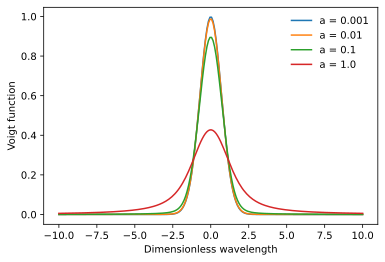

In [4]:
from scipy.special import wofz

def voigt(damping, u):
    """
    Calculates the Voigt function.
    """
    z = (u + 1j * damping)
    return wofz(z).real

u = numpy.linspace(-10, 10, 200)
a = numpy.logspace(-3, 0, 4)

fig, ax = plt.subplots()
ax.plot(u, voigt(a[numpy.newaxis], u[:, numpy.newaxis]))
legend_elements = ['a = %s' % value for value in a]
ax.legend(legend_elements)
ax.set_ylabel('Voigt function')
ax.set_xlabel('Dimensionless wavelength');

The Voigt profile is the final ingredient you need to calculate $\tau_\lambda$ and the spectral line profiles according to equation (7).

### 2.5 The equivalent width of spectral lines

By studying the line profile plots as a function of $\tau(0)$ you can see that the growth of the
absorption feature in the spectrum for increasing $\tau(0)$ 
is faster for small $\tau(0)$ then when it "saturates" for
larger $\tau(0)$.   Minnaert and coworkers introduced the
*equivalent width* $W_\lambda$ as a line-strength
parameter to measure this growth quantitively.
It measures the integrated line depression in the normalized spectrum:

\begin{equation} \tag{14}
   W_\lambda \equiv \int 1 - \frac{I(\lambda)}{I_{\rm cont}}
               {\rm d} \lambda,
\end{equation}

so that its value is the same as the width of a rectangular piece of spectrum that blocks the same amount of spectrum completely (see demonstration figure below). Here is a visualisation of the area of a line profile and its equivalent width:

<img src="https://tiagopereira.space/ast4310/images/eqw.svg" alt="Radiation through a layer" width="500"/>


To integrate a spectral profile numerically, you can use [`numpy.trapz`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.trapz.html). 

### 2.6 The curve of growth

The idea behind the equivalent width was obviously that the amount
of spectral blocking should be a direct measure 
of the number of atoms in the reversing layer.  They should set the opaqueness $\tau(0)$ of the
layer.  The profile plots should illustrate that the profile growth 
is only linear with $\tau(0)$ for $\tau(0) \ll 1$.  The "curve of growth" describes the full dependence: the growth of
the line strength with the line-causing particle density.  Here's an observed example:

<img src="https://tiagopereira.space/ast4310/images/p341.svg" alt="Curve of growth" width="800"/>

*Empirical curve of growth for solar
    Fe I and Ti I lines.
    Taken from [Mihalas (1970)](https://ui.adsabs.harvard.edu/abs/1970stat.book.....M), 
    who took it from [Wright (1948)](https://ui.adsabs.harvard.edu/abs/1948PDAO....8....1W). Wright measured the equivalent widths of 700 lines in the Utrecht  Atlas.
    The quantity $X_f$ along the x axis scales with the product of the
    transition probability and the population density of the lower
    level of each line. The populations were computed from the Saha-Boltzmann laws as in
    Exercise 1. The transition probabilities were measured in the laboratory.
    The normalization of $W$ by $\lambda$ removes the $\lambda$-dependence of the Doppler width.*

---


### Exercise 3: Spectral lines from a solar reversing layer [30 points]

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

* *[7 points]* Compute and plot the emergent line profiles using a Schuster-Schwarzschild model for a reference wavelength of 500 nm, writing code for this purpose. Try changing the parameters (`temp_surface`, `temp_layer`, `a`, `tau0`) to see if you can obtain a saturated line profile (flat bottom). Which parameter(s) are more important in determining this?

* *[7 points]* Study line profiles with different $\tau_0$, using `tau0 = 10 ** numpy.linspace(-2, 2, 9)`. How do you explain the profile shapes for $\tau(0) \ll 1$? Why is there a low-intensity saturation limit for $\tau \gg 1$? Why do the line wings develop only for very large $\tau(0)$? 

* *[8 points]* Now study the dependence of these line profiles on wavelength by repeating the above for $\lambda=$ 200 nm (ultraviolet) and $\lambda=$ 1000 nm (near infrared). What sets the top value $I_{\rm cont}$ and the limit value reached at line center, $I_{u=0}$? Check these values by computing them directly. What happens to these values at other wavelengths?  

* *[8 points]* Make a figure with plots for the above: line profiles for several values of $\tau_0$, and the three different wavelengths: 200, 500, and 1000 nm. However, normalise each line profile by its continuum intensity: `intensity /= intensity[0]` (observed spectra are usually normalised this way because absolute calibrations are often missing). Explain the wavelength dependencies in this plot.

</div>


### Exercise 4: The curve of growth [30 points]

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

* *[7 points]* Using the code from Exercise 3, compute and plot a curve of growth by plotting $W_\lambda$ against $\tau_0$ on a log-log plot. Explain what happens in the three different parts.  

* *[10 points]* The first part has slope 1:1, the third part has slope 1:2 in this log-log plot.  Why?

* *[7 points]* Which parameter controls the location of the onset of the third part? Give a rough estimate of its value for solar iron lines through comparison with the given figure from Wright (1948).

* *[6 points]* Which parameter should you increase to produce emission lines instead of absorption lines? Change it accordingly and modify the code to produce emission profiles and an emission-line curve of growth. (To avoid taking the log of negative $W_\lambda$, plot the absolute value of $W_\lambda$.)
    
</div>